# Dockless Vehicle Trip Data

In [1]:
import shapely, geopandas, matplotlib 
import matplotlib.pyplot as plt

In [2]:
austin = geopandas.GeoDataFrame.from_file('/home/jovyan/work/data/census_tracts_2010_msa/census_tracts_2010_msa.shp',)
austin.head()

,TRACTCE10,SUM_totpop,SUM_white,SUM_black,SUM_hispan,SUM_asian,SUM_other,SUM_multi,SUM_hu_tot,SUM_hu_occ,...,SUM_AGE651,SUM_AGE_65,SUM_AGE75_,SUM_AGE80_,SUM_AGE_85,SUM_FAMSWC,SUM_POP_IN,SUM_FAMILI,SUM_NONFAM,geometry
0,000101,3611.0,3130.0,39.0,276.0,90.0,9.0,67.0,2076.0,1815.0,...,38.0,151.0,79.0,103.0,303.0,354.0,77.0,805.0,1010.0,"POLYGON ((3110996.149334418 10094866.83662638,..."
1,000102,2552.0,2311.0,23.0,150.0,42.0,3.0,23.0,1153.0,1081.0,...,70.0,253.0,77.0,66.0,91.0,299.0,18.0,735.0,346.0,"POLYGON ((3108183.235349492 10097092.04712778,..."
2,000203,1546.0,1073.0,87.0,213.0,143.0,5.0,25.0,817.0,735.0,...,8.0,25.0,6.0,6.0,2.0,32.0,281.0,122.0,613.0,"POLYGON ((3117475.629412891 10088913.11716985,..."
3,000204,3009.0,2396.0,43.0,323.0,161.0,8.0,78.0,1750.0,1596.0,...,21.0,80.0,27.0,20.0,26.0,234.0,56.0,495.0,1101.0,"POLYGON ((3114760.420262146 10081981.02697965,..."
4,000205,3394.0,2333.0,110.0,676.0,162.0,24.0,89.0,2153.0,1996.0,...,35.0,95.0,30.0,28.0,21.0,212.0,0.0,557.0,1439.0,"POLYGON ((3118490.457187081 10090915.15399349,..."


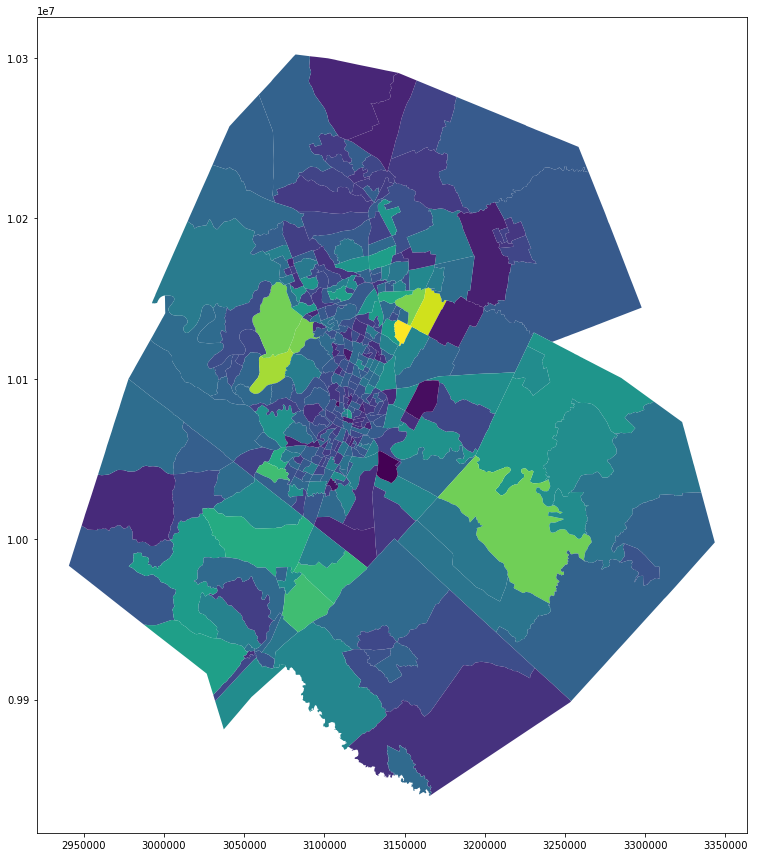

In [3]:
fig, ax = plt.subplots(figsize=(15,15))
austin.plot(column = 'SUM_totpop', ax = ax)
plt.show()

In [4]:
import pandas as pd 

scooter_data = pd.read_csv('~/work/data/Dockless_Vehicle_Trips.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
scooter_data = scooter_data.dropna(subset=['Census Tract Start'])

In [6]:
scooter_data['Census Tract Start'].value_counts().idxmax()

'48453001100'

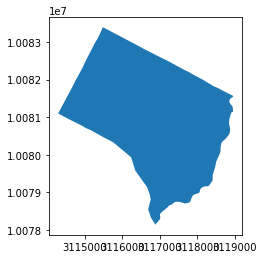

In [7]:
austin[austin['TRACTCE10']=='000500']['geometry'].plot()

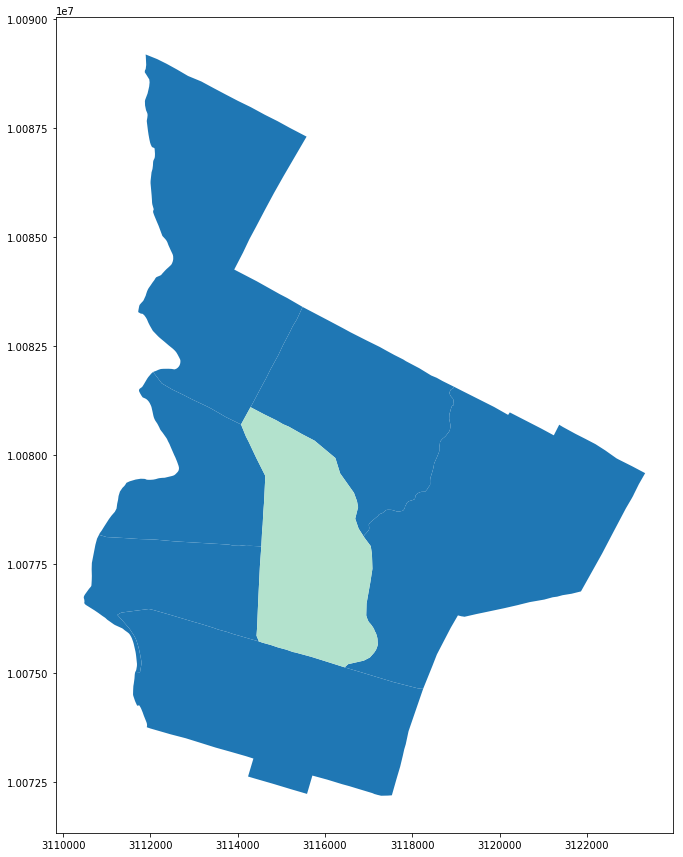

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
oncampus  = ['000601']
offcampus = ['000603', '000604', '000700', '000401', '000500', '000204']
austin[austin['TRACTCE10'].isin(offcampus)].plot(ax = ax)
austin[austin['TRACTCE10'].isin(oncampus)].plot(ax = ax, cmap='Pastel2')

In [9]:
scooter_data.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,scooter,170.0,0.0,04/29/2019 05:30:00 PM,04/29/2019 05:30:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,scooter,90.0,0.0,04/29/2019 05:30:00 PM,04/29/2019 05:30:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,scooter,570.0,826.0,04/29/2019 05:15:00 PM,04/29/2019 05:15:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
5,cd442fb9-058f-46a7-af90-b4adb56fd163,1653cf10-75f5-4934-a9d9-c8d43ade67a9,scooter,438.0,1815.0,04/29/2019 05:30:00 PM,04/29/2019 05:45:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
6,e1ac0e42-ab2d-4eac-b019-f085169c1d38,1d89f9e2-d01a-4736-b7d8-258cb9a2108c,scooter,391.0,1519.0,04/29/2019 05:30:00 PM,04/29/2019 05:30:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10


In [49]:
time_freq = scooter_data[scooter_data['Day of Week'] == 3].groupby(['Hour'])['Hour'].agg('count').to_frame('count').reset_index()

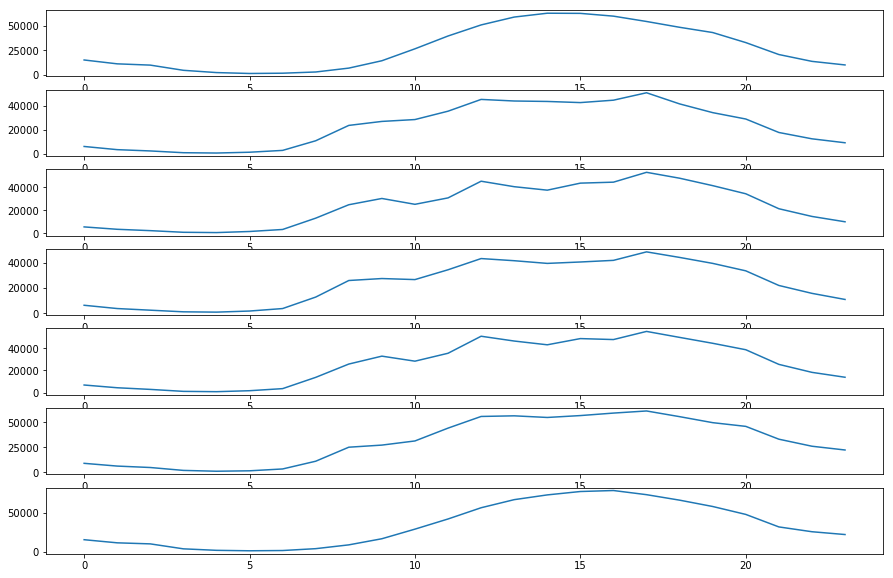

In [50]:
fig, ax = plt.subplots(7, 1,figsize=(15, 10))
for i in range(7):
    time_freq = scooter_data[scooter_data['Day of Week'] == i].groupby(['Hour'])['Hour'].agg('count').to_frame('count').reset_index()
    ax[i].plot(time_freq['Hour'], time_freq['count'])


In [25]:
day_freq = scooter_data.groupby(['Day of Week'])['Day of Week'].agg('count').to_frame('count').reset_index()
day_freq

,Day of Week,count
0,0.0,656172
1,1.0,556689
2,2.0,577789
3,3.0,566167
4,4.0,639356
5,5.0,741429
6,6.0,824060


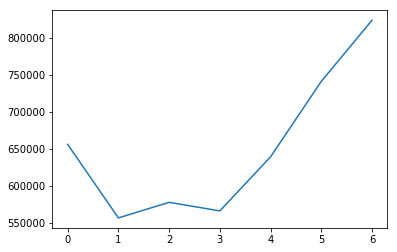

In [46]:
fig, ax = plt.subplots()
ax.plot(day_freq['Day of Week'], day_freq['count'])